In [1]:
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
from memote import ReportConfiguration
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from umap import UMAP

In [3]:
%matplotlib inline

## Extract

In [4]:
df = pd.concat([
    pd.read_csv("data/bigg/metrics.csv"),
    pd.read_csv("data/uminho/metrics.csv"),
#     pd.read_csv("data/mmodel/sbml/metrics.csv"),
    pd.read_csv("data/mmodel/sbml3/metrics.csv"),
    pd.read_csv("data/AGORA/metrics.csv"),
    pd.read_csv("data/embl_gems/metrics.csv"),
    pd.read_csv("data/BioModels_Database-r27_p2m-whole_genome_metabolism/metrics.csv"),
], ignore_index=True)

In [5]:
df.shape

(1153315, 7)

In [6]:
df.head()

,test,title,section,metric,numeric,model,collection
0,test_absolute_extreme_coefficient_ratio,Ratio Min/Max Non-Zero Coefficients,matrix,0.0,NaN,iE2348C_1286,BiGG
1,test_biomass_consistency,Biomass Consistency,test_biomass,1.0,0.999658,iE2348C_1286,BiGG
2,test_biomass_consistency,Biomass Consistency,test_biomass,1.0,0.999994,iE2348C_1286,BiGG
3,test_biomass_default_production,Biomass Production In Default Medium,test_biomass,1.0,0.000000,iE2348C_1286,BiGG
4,test_biomass_default_production,Biomass Production In Default Medium,test_biomass,1.0,0.982478,iE2348C_1286,BiGG


## Transform

### Pivot Table

In [7]:
df.set_index(["collection", "model", "test"], inplace=True)

In [9]:
df[df.index.duplicated(keep=False)].sort_index()

title  \
collection  model                            test                                                                                            
AGORA       Abiotrophia_defectiva_ATCC_49176 test_biomass_consistency                                                  Biomass Consistency   
                                             test_biomass_consistency                                                  Biomass Consistency   
                                             test_biomass_default_production                          Biomass Production In Default Medium   
                                             test_biomass_default_production                          Biomass Production In Default Medium   
                                             test_biomass_open_production                            Biomass Production In Complete Medium   
                                             test_biomass_open_production                            Biomass Production In Complete Medium   
                                             test_biomass_precursors_default_production       Blocked Biomass Precursors In Default Medium   
                                             test_biomass_precursors_default_production       Blocked Biomass Precursors In Default Medium   
                                             test_biomass_precursors_open_production         Blocked Biomass Precursors In Complete Medium   
                                             test_biomass_precursors_open_production         Blocked Biomass Precursors In Complete Medium   
                                             test_direct_metabolites_in_biomass            Ratio of Direct Metabolites in Biomass Reaction   
                                             test_direct_metabolites_in_biomass            Ratio of Direct Metabolites in Biomass Reaction   
                                             test_essential_precursors_not_in_biomass       Number of Missing Essential Biomass Precursors   
                                             test_essential_precursors_not_in_biomass       Number of Missing Essential Biomass Precursors   
                                             test_fast_growth_default                            Unrealistic Growth Rate In Default Medium   
                                             test_fast_growth_default                            Unrealistic Growth Rate In Default Medium   
                                             test_gam_in_biomass                         Growth-associated Maintenance in Biomass Reaction   
                                             test_gam_in_biomass                         Growth-associated Maintenance in Biomass Reaction   
            Achromobacter_xylosoxidans_A8    test_biomass_consistency                                                  Biomass Consistency   
                                             test_biomass_consistency                                                  Biomass Consistency   
                                             test_biomass_default_production                          Biomass Production In Default Medium   
                                             test_biomass_default_production                          Biomass Production In Default Medium   
                                             test_biomass_open_production                            Biomass Production In Complete Medium   
                                             test_biomass_open_production                            Biomass Production In Complete Medium   
                                             test_biomass_precursors_default_production       Blocked Biomass Precursors In Default Medium   
                                             test_biomass_precursors_default_production       Blocked Biomass Precursors In Default Medium   
                                             test_biomass_precursors_open_production         Blocked Biomass Precursors In Complete Medium   
               

In [13]:
observations = df.loc[
    ~(df.index.duplicated(keep="first") | df["numeric"].isnull()),
    ["numeric"]
].unstack()
observations.head()

numeric  \
test                                             test_biomass_consistency   
collection model                                                            
AGORA      Abiotrophia_defectiva_ATCC_49176                           NaN   
           Achromobacter_xylosoxidans_A8                              NaN   
           Achromobacter_xylosoxidans_NBRC_15126                      NaN   
           Acidaminococcus_fermentans_DSM_20731                       NaN   
           Acidaminococcus_intestini_RyC_MR95                         NaN   

                                                                                  \
test                                             test_biomass_default_production   
collection model                                                                   
AGORA      Abiotrophia_defectiva_ATCC_49176                            62.686411   
           Achromobacter_xylosoxidans_A8                              124.707398   
           Achromobacter_xylosoxidans_NBRC_15126                       65.634252   
           Acidaminococcus_fermentans_DSM_20731                        76.408480   
           Acidaminococcus_intestini_RyC_MR95                          61.530599   

                                                                               \
test                                             test_biomass_open_production   
collection model                                                                
AGORA      Abiotrophia_defectiva_ATCC_49176                         63.737553   
           Achromobacter_xylosoxidans_A8                           124.707398   
           Achromobacter_xylosoxidans_NBRC_15126                    65.634252   
           Acidaminococcus_fermentans_DSM_20731                     81.357224   
           Acidaminococcus_intestini_RyC_MR95                       63.880222   

                                                                                             \
test                                             test_biomass_precursors_default_production   
collection model                                                                              
AGORA      Abiotrophia_defectiva_ATCC_49176                                             0.0   
           Achromobacter_xylosoxidans_A8                                                0.0   
           Achromobacter_xylosoxidans_NBRC_15126                                        0.0   
           Acidaminococcus_fermentans_DSM_20731                                         0.0   
           Acidaminococcus_intestini_RyC_MR95                                           0.0   

                                                                                          \
test                                             test_biomass_precursors_open_production   
collection model                                                                           
AGORA      Abiotrophia_defectiva_ATCC_49176                                          0.0   
           Achromobacter_xylosoxidans_A8                                             0.0   
           Achromobacter_xylosoxidans_NBRC_15126                                     0.0   
           Acidaminococcus_fermentans_DSM_20731                                      0.0   
           Acidaminococcus_intestini_RyC_MR95                                        0.0   

                                                                        \
test                                             test_biomass_presence   
collection model                                                         
AGORA      Abiotrophia_defectiva_ATCC_49176                        2.0   
           Achromobacter_xylosoxidans_A8                           2.0   
           Achromobacter_xylosoxidans_NBRC_15126                   2.0   
           Acidaminococcus_fermentans_DSM_20731                    2.0   
           Acidaminococcus_intestini_RyC_MR95                      2.0   

                                    

In [16]:
observations.describe()

numeric                                  \
test  test_biomass_consistency test_biomass_default_production   
count              8161.000000                    8.968000e+03   
mean                 12.893201                    1.483494e+02   
std                 570.120801                    1.056378e+04   
min                   0.000000                   -1.198743e-30   
25%                   0.000000                    0.000000e+00   
50%                   0.000000                    3.209169e+01   
75%                   6.037116                    4.862925e+01   
max               29740.926432                    9.999990e+05   

                                                                               \
test  test_biomass_open_production test_biomass_precursors_default_production   
count                 8.968000e+03                                8949.000000   
mean                  2.359935e+02                                   3.977651   
std                   1.056204e+04                                   6.725354   
min                  -1.572188e-29                                   0.000000   
25%                   1.769734e+01                                   0.000000   
50%                   3.809422e+01                                   0.000000   
75%                   6.015569e+01                                   9.000000   
max                   9.999990e+05                                 108.000000   

                                                                     \
test  test_biomass_precursors_open_production test_biomass_presence   
count                             8949.000000           9021.000000   
mean                                 0.373003              1.103647   
std                                  1.992973              0.453380   
min                                  0.000000              0.000000   
25%                                  0.000000              1.000000   
50%                                  0.000000              1.000000   
75%                                  0.000000              1.000000   
max                                108.000000             15.000000   

                                                                 \
test  test_biomass_specific_sbo_presence test_blocked_reactions   
count                        9021.000000            9019.000000   
mean                            1.084137              69.074620   
std                             0.419473             127.948256   
min                             0.000000               0.000000   
25%                             1.000000              17.000000   
50%                             1.000000              31.000000   
75%                             1.000000              41.000000   
max                            15.000000            1512.000000   

                                                                    \
test  test_compartments_presence test_demand_specific_sbo_presence   
count                9021.000000                       9021.000000   
mean                    2.623656                          0.661789   
std                     0.626229                          2.763179   
min                     0.000000                          0.000000   
25%                     2.000000                          0.000000   
50%                     3.000000                          0.000000   
75%                     3.000000                          0.000000   
max                    14.000000                        102.000000   

                           ...                       \
test                       ...                        
count                      ...                        
mean                       ...                        
std                        ...                        
min                        ...                        
25%                        ...                        
50%                        ...                        
75%                        .

In [19]:
observations.isna().sum(axis=0)

         test                                               
numeric  test_biomass_consistency                                860
         test_biomass_default_production                          53
         test_biomass_open_production                             53
         test_biomass_precursors_default_production               72
         test_biomass_precursors_open_production                  72
         test_biomass_presence                                     0
         test_biomass_specific_sbo_presence                        0
         test_blocked_reactions                                    2
         test_compartments_presence                                0
         test_demand_specific_sbo_presence                         0
         test_essential_precursors_not_in_biomass                 70
         test_exchange_specific_sbo_presence                       0
         test_find_constrained_pure_metabolic_reactions            3
         test_find_constrained_transport_r

Ignore problematic test cases and models for now.

In [30]:
clean = observations.drop(labels=["test_ngam_presence"], axis=1, level=1).dropna()

## Dimension Reduction

In [25]:
plt.rcParams['figure.figsize'] = 16, 9

### PCA

In [31]:
%%time
pca = PCA(n_components=2).fit_transform(clean)

CPU times: user 142 ms, sys: 114 ms, total: 256 ms
Wall time: 40.1 ms


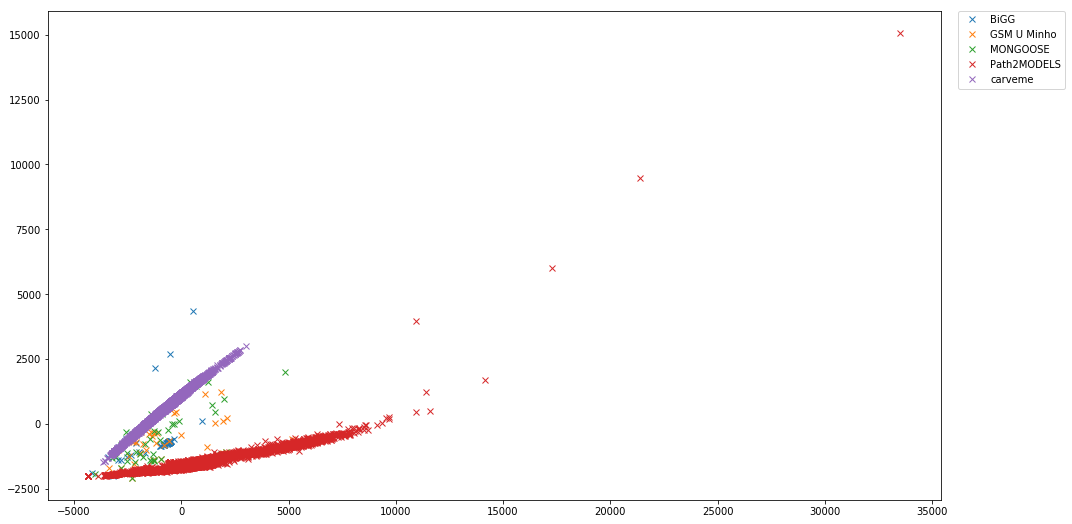

In [32]:
for label in clean.index.get_level_values("collection").unique():
    mask = clean.index.get_level_values("collection") == label
    plt.plot(pca[mask, 0], pca[mask, 1], "x", label=label)
plt.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.0)
plt.show()

### t-SNE

In [33]:
%%time
tsne = TSNE(n_components=2).fit_transform(clean)

CPU times: user 49.5 s, sys: 23.3 ms, total: 49.5 s
Wall time: 49.6 s


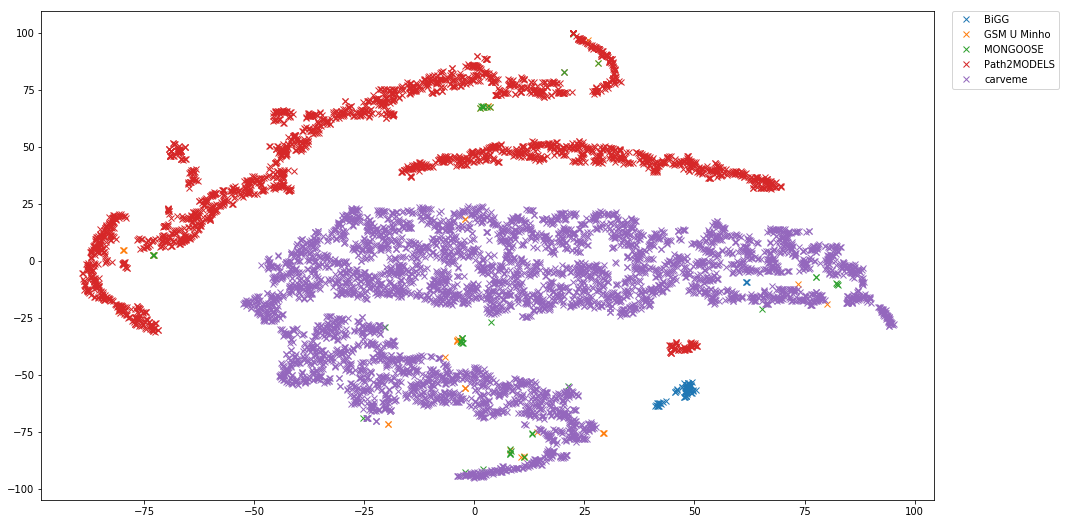

In [34]:
for label in clean.index.get_level_values("collection").unique():
    mask = clean.index.get_level_values("collection") == label
    plt.plot(tsne[mask, 0], tsne[mask, 1], "x", label=label)
plt.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.0)
plt.show()

### UMAP

In [36]:
%%time
umap = UMAP(n_components=2).fit_transform(clean)

CPU times: user 27.1 s, sys: 2.52 s, total: 29.6 s
Wall time: 25.6 s


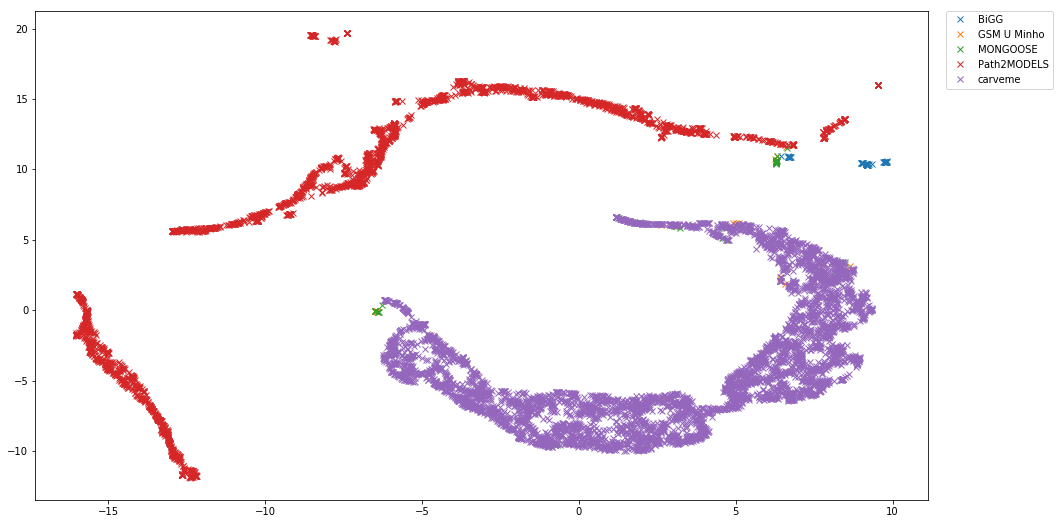

In [37]:
for label in clean.index.get_level_values("collection").unique():
    mask = clean.index.get_level_values("collection") == label
    plt.plot(umap[mask, 0], umap[mask, 1], "x", label=label)
plt.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.0)
plt.show()